In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [26]:
df = pd.read_csv('Burger_Sales.csv', index_col = 'Date', parse_dates = True)

In [27]:
df_sales = df.loc["2021-1-7":"2022-5-9",['burger_sales']]
df_sales

,burger_sales
Date,
2021-01-07,6020
2021-01-08,7790
2021-01-09,5460
2021-01-10,5180
2021-01-11,6490
...,...
2022-05-05,11000
2022-05-06,12740
2022-05-07,13140


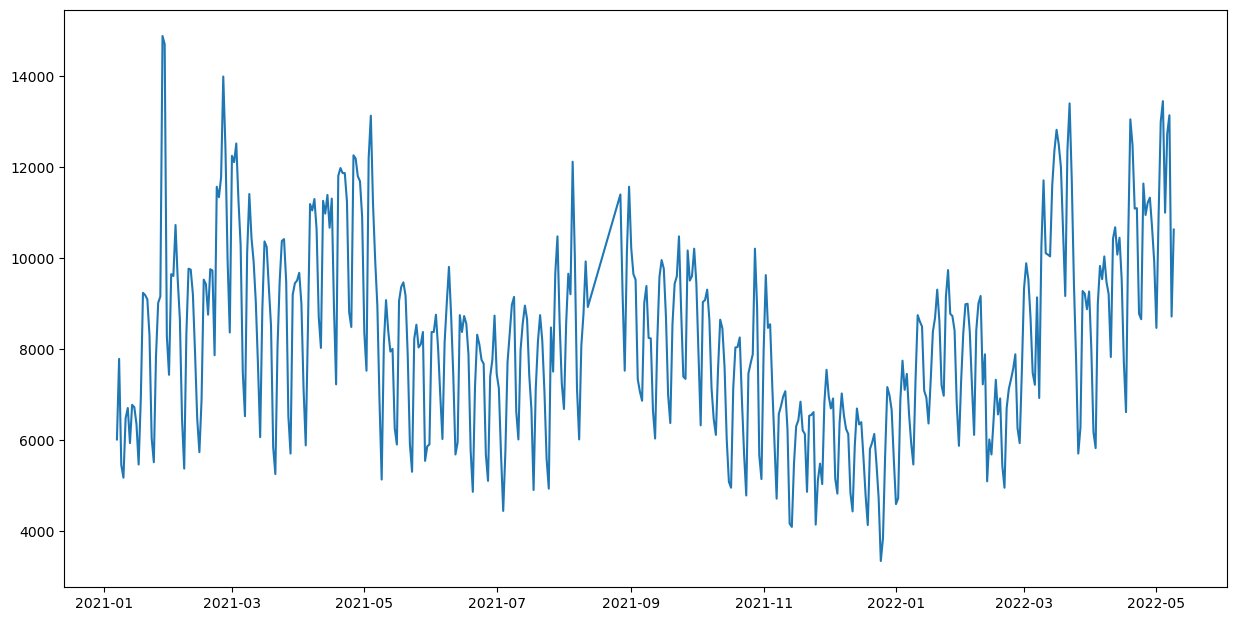

In [4]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df_sales);

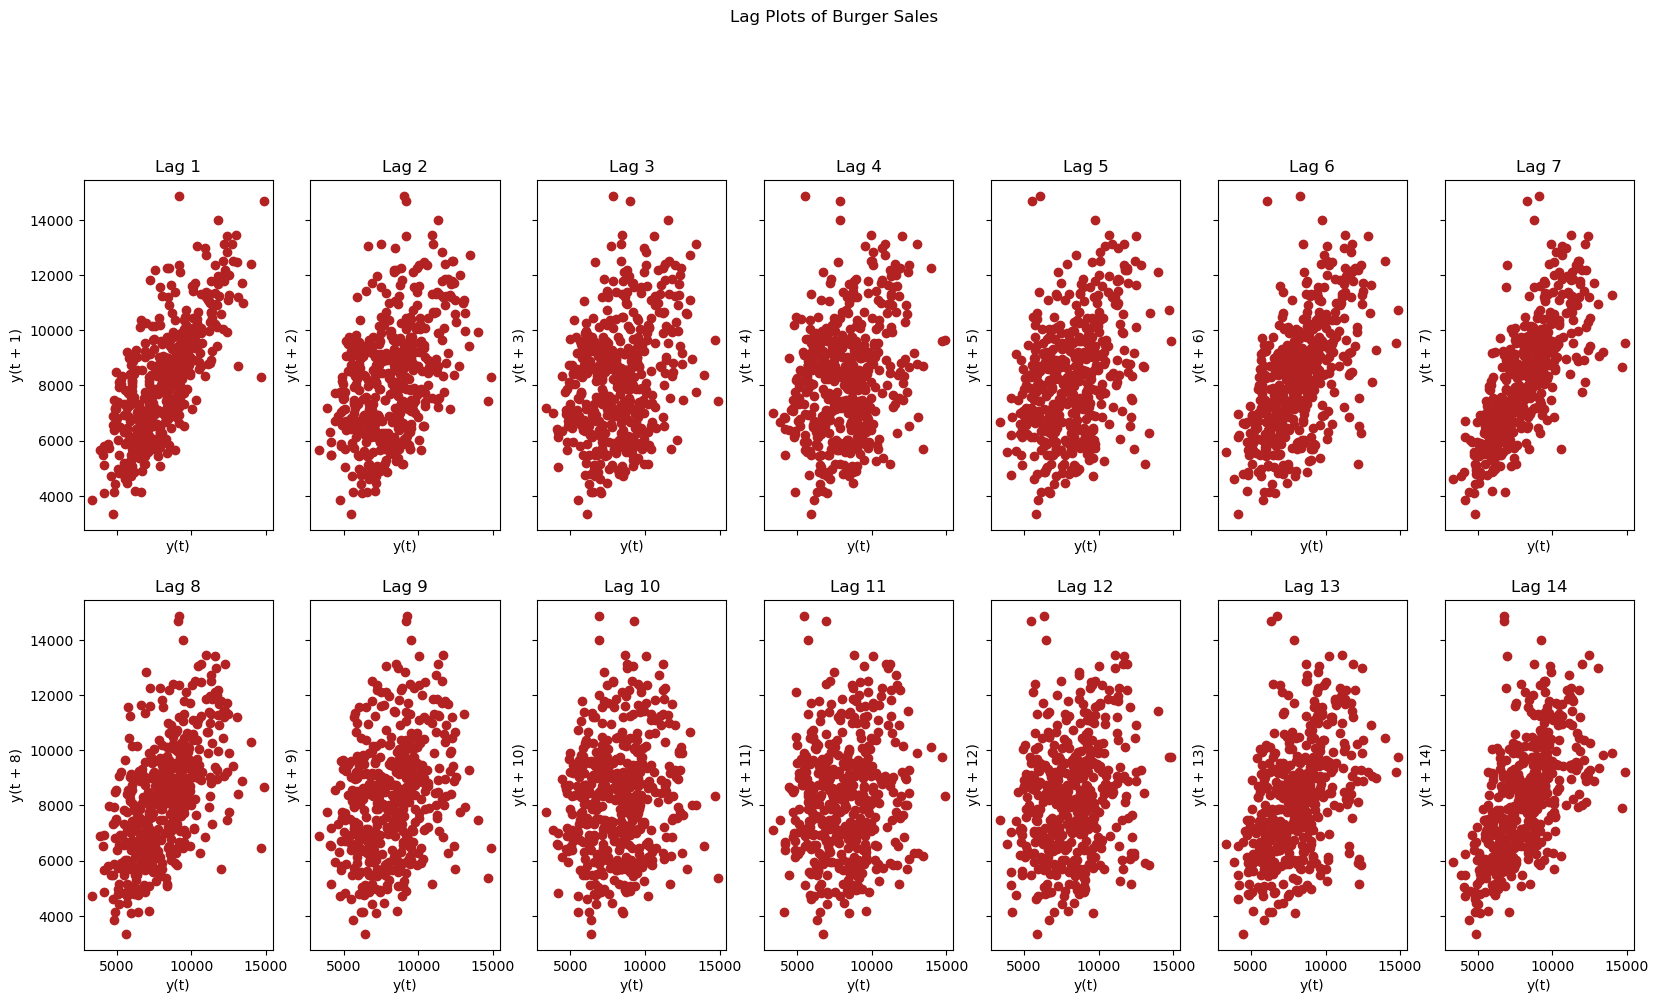

In [5]:
from pandas.plotting import lag_plot

fig, axes = plt.subplots(2, 7, figsize=(20,10), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:14]):
    lag_plot(df_sales, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Burger Sales', y=1.05)    
plt.show()  

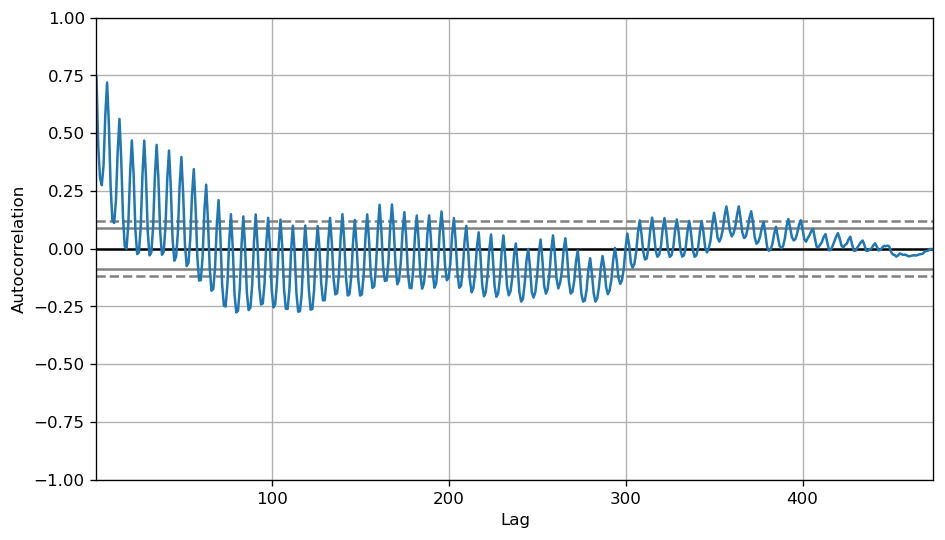

In [6]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df_sales);

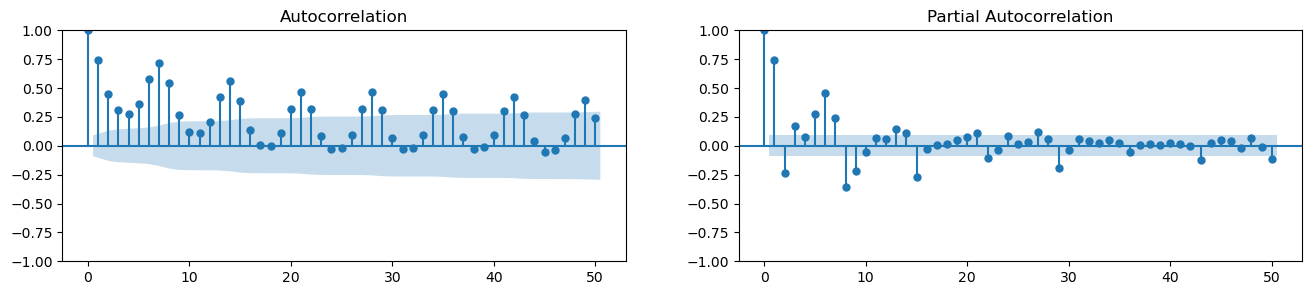

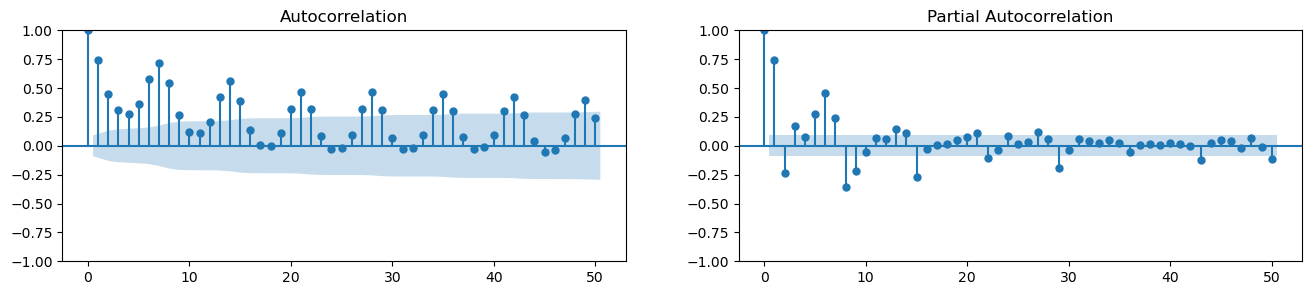

In [35]:
fig, axs = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_sales, lags=50, ax=axs[0])
plot_pacf(df_sales, lags=50, ax=axs[1])

In [4]:
from statsmodels.tsa.stattools import adfuller
# ADF Test -Ho vremenska serija nije stacinarna i poseduje jedinicni koren
ad_fuller_result = adfuller(df_sales)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.822123113861114
p-value: 0.05518246641686489


p vrednost je veca od 0.05, sto znaci da prihvatamo Ho i kazemo da vremenska serija nije stacionarna

In [114]:
from statsmodels.tsa.stattools import adfuller
# ADF Test -Ho vremenska serija nije stacinarna i poseduje jedinicni koren
kpss_result = kpss(df_sales)
print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')

KPSS Statistic: 0.453202961766125
p-value: 0.05422286130770475


In [28]:
df_sales = np.log(df_sales)
df_sales = df_sales.diff()
df_sales = df_sales.tail(-1)

In [29]:
df_sales

,burger_sales
Date,
2021-01-08,0.257754
2021-01-09,-0.355392
2021-01-10,-0.052644
2021-01-11,0.225457
2021-01-12,0.033336
...,...
2022-05-05,-0.201084
2022-05-06,0.146851
2022-05-07,0.030914


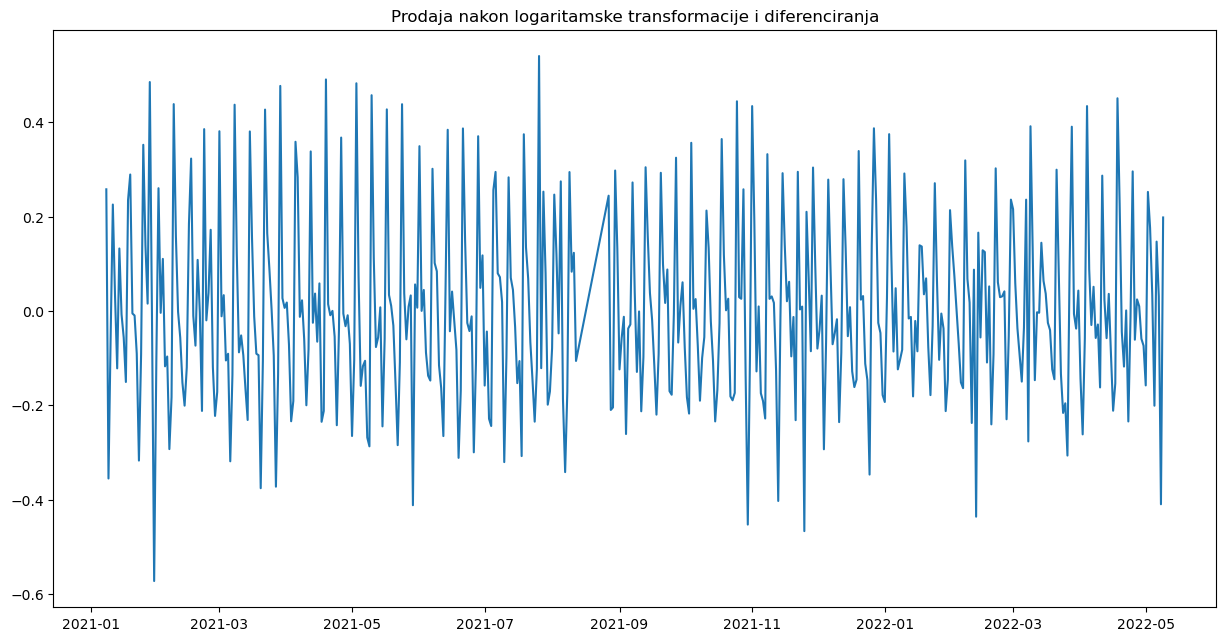

In [46]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df_sales)
plt.title("Prodaja nakon logaritamske transformacije i diferenciranja")
plt.show();

Logaritamska transformacija se često koristi za stabilizaciju varijanse u vremenskim serijama. 
Logaritmovanjem možete smanjiti uticaj većih vrednosti i povećati uticaj manjih vrednosti.
iferenciranje je matematička operacija koja se koristi da bi se uklonili trendovi ili sezonske komponente iz vremenskih serija. 
Oduzima se svaka trenutna vrednost od prethodne vrednosti, 
što rezultira novim nizom vrednosti koje predstavljaju promene između uzastopnih tačaka.

In [30]:
# Seasonal differencing

df_sales = df_sales.diff(7)
df_sales = df_sales.tail(-7)

In [13]:
df_sales

,burger_sales
Date,
2021-01-15,-0.265156
2021-01-16,0.298845
2021-01-17,-0.098106
2021-01-18,0.009680
2021-01-19,0.255790
...,...
2022-05-05,-0.210840
2022-05-06,0.205933
2022-05-07,0.104734


In [14]:
ad_fuller_result = adfuller(df_sales)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -9.32340085303596
p-value: 9.75493793729029e-16


Vremenska serija je sada stacionarna.

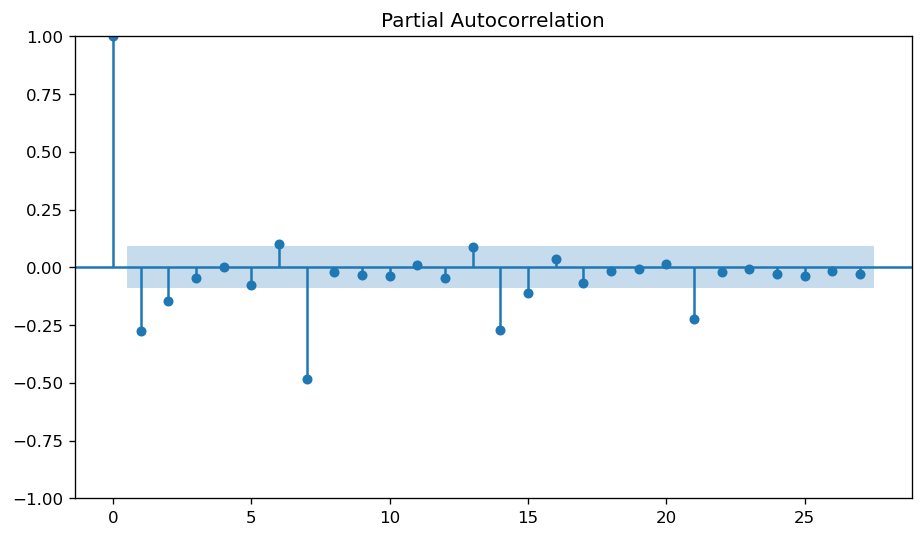

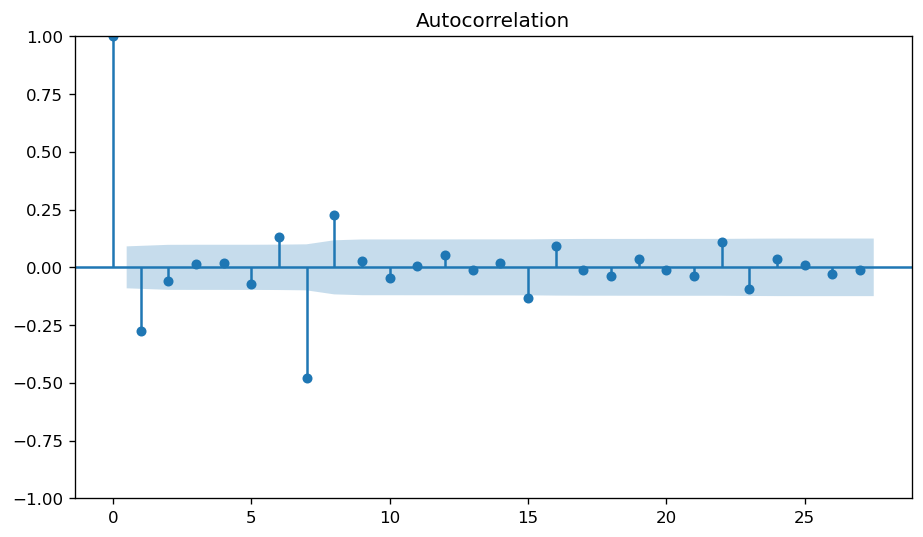

In [15]:
plot_pacf(df_sales);
plot_acf(df_sales);

In [31]:
train = df_sales.iloc[:450]
test = df_sales.iloc[449:]

In [15]:
train

,burger_sales
Date,
2021-01-15,-0.265156
2021-01-16,0.298845
2021-01-17,-0.098106
2021-01-18,0.009680
2021-01-19,0.255790
...,...
2022-04-19,0.204258
2022-04-20,0.013159
2022-04-21,-0.154132


In [23]:
test

,burger_sales
Date,
2022-04-23,-0.022790
2022-04-24,0.139957
2022-04-25,-0.155016
2022-04-26,-0.289052
2022-04-27,0.069019
2022-04-28,0.127840
2022-04-29,-0.059983
2022-04-30,0.160649
2022-05-01,-0.144261


In [22]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [32]:
p = range(0, 7, 1)
d = 1
q = range(0, 7, 1)
P = range(0, 7, 1)
D = 1
Q = range(0, 7, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

2401


In [24]:
result_df = optimize_SARIMA(parameters_list, d, D, s, train)
result_df

  0%|          | 0/2401 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 4, 0, 2)",-644.774310
1,"(1, 2, 2, 2)",-644.125586
2,"(5, 1, 0, 2)",-644.029586
3,"(0, 3, 0, 2)",-644.004373
4,"(0, 4, 0, 3)",-643.895997
...,...,...
2396,"(3, 0, 0, 0)",121.842718
2397,"(2, 0, 0, 0)",170.703726
2398,"(0, 0, 1, 0)",185.213951
2399,"(1, 0, 0, 0)",263.266571


In [35]:
best_model = SARIMAX(train, order=(5, d, 1), seasonal_order=(0, D, 2, s)).fit(dis=-1)
print(best_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                           burger_sales   No. Observations:                  450
Model:             SARIMAX(5, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                 331.015
Date:                                Sun, 03 Sep 2023   AIC                           -644.030
Time:                                        14:33:07   BIC                           -607.208
Sample:                                             0   HQIC                          -629.506
                                                - 450                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2853      0.040     -7.149      0.000      -0.364      -0.207
ar.

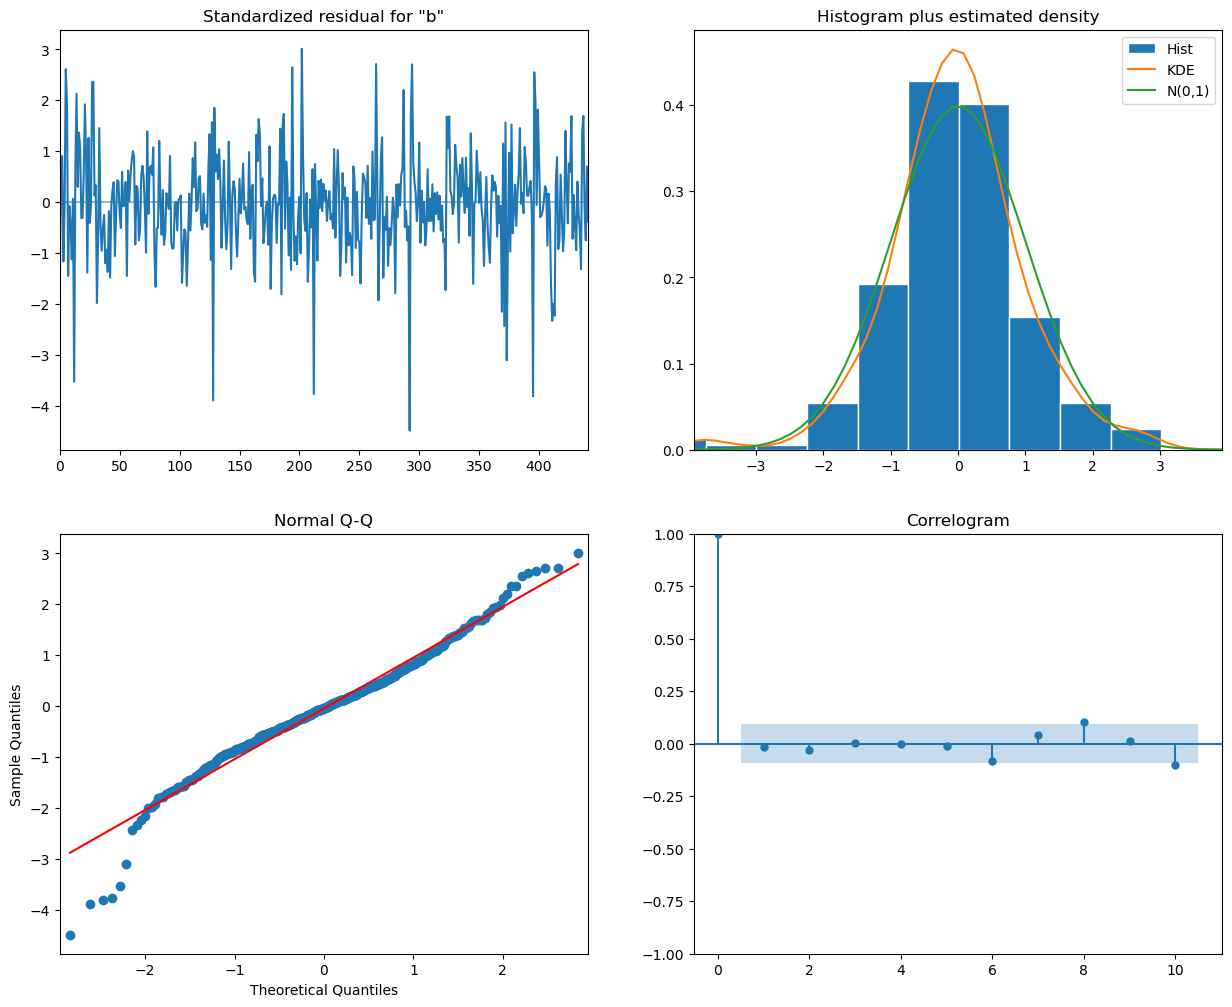

In [16]:
best_model.plot_diagnostics(figsize=(15,12));

In [17]:
train['sarima_model'] = best_model.fittedvalues

In [18]:
pred_data = best_model.predict(start = len(train), end = (len(df_sales)))
predictions_df = pd.DataFrame(index=test.index, columns=['predictions'])
predictions_df['predictions'] = pred_data.values

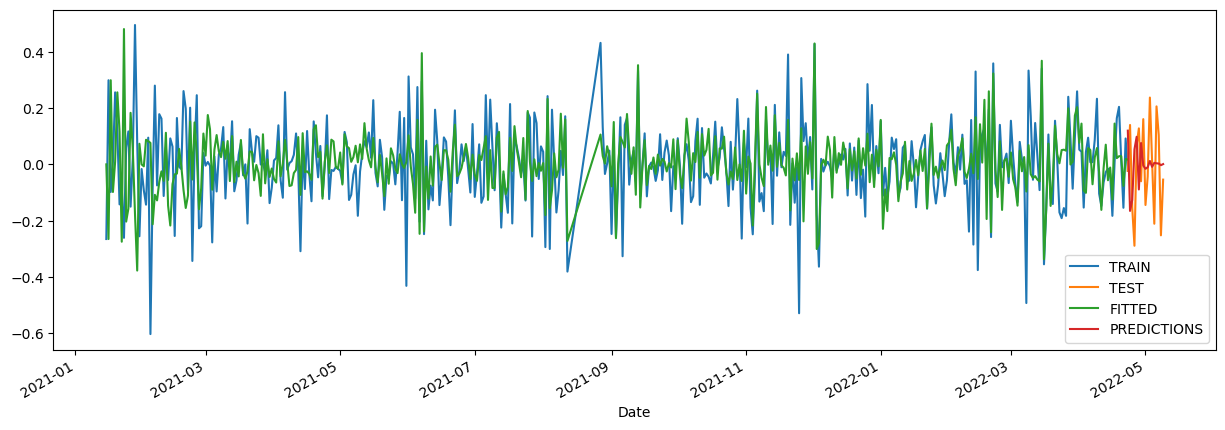

In [19]:
train['burger_sales'].plot(legend = True, label = 'TRAIN', figsize = (15,5))
test['burger_sales'].plot(legend = True, label = 'TEST', figsize = (15,5));
train['sarima_model'].plot(legend = True, label = 'FITTED', figsize = (15,5));
predictions_df['predictions'].plot(legend = True, label = 'PREDICTIONS', figsize = (15,5));

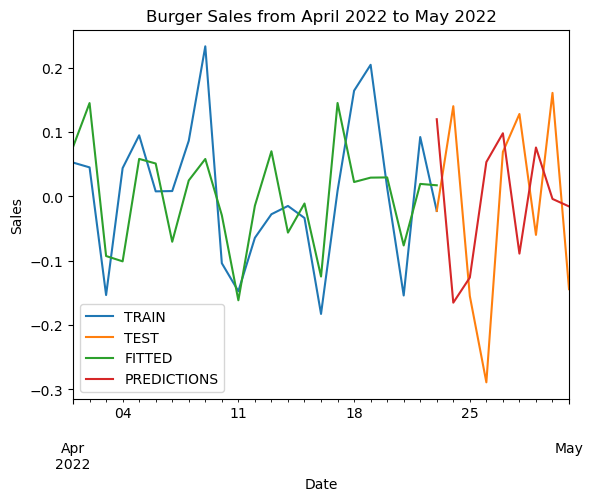

In [22]:
start_date = '2022-04-01'
end_date = '2022-05-01'

# Subset the data for the desired date range
subset_train = train[start_date:end_date]
subset_test = test[start_date:end_date]
subset_predictions = predictions_df[start_date:end_date]

subset_train['burger_sales'].plot(legend=True, label='TRAIN')
subset_test['burger_sales'].plot(legend=True, label='TEST')
subset_train['sarima_model'].plot(legend=True, label='FITTED')
subset_predictions['predictions'].plot(legend=True, label='PREDICTIONS')

plt.title('Burger Sales from April 2022 to May 2022')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [125]:
error = np.sqrt(mean_squared_error(test,predictions_df))
error

0.18096332266494597

In [108]:
test.values.mean()

-0.010384365867019674

In [109]:
test.values.std()

0.15713480865161555